<a href="https://colab.research.google.com/github/Pearlcentt/Group18-ML-StockPricePrediciton/blob/feature/Stock_RFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score

#Load data

In [11]:
path = "/content/AAPL.csv"
stockdt = pd.read_csv(path, index_col = 'Date', parse_dates = True)

In [12]:
stockdt.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600


In [13]:
stockdt.shape

(10836, 6)

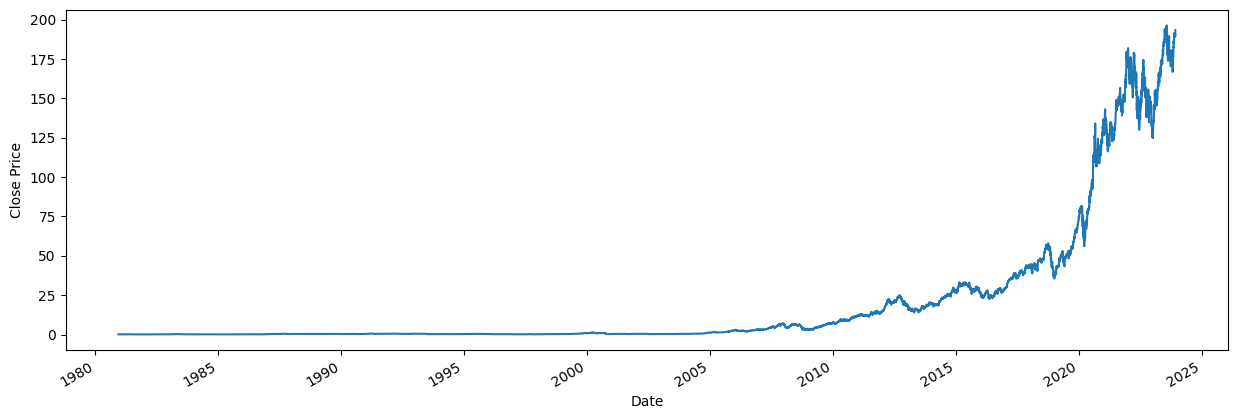

In [14]:
plt.figure(figsize=(15,5))
stockdt['Close'].plot()
plt.ylabel('Close Price')
plt.show()

# Smooth data

In [15]:
alpha = 0.045

In [16]:
stockdt['Smooth'] = pd.Series(np.array([0 for i in range(stockdt.shape[0])]))
stockdt['Smooth'][0] = stockdt['Close'][0]

<ipython-input-16-ccca33800462>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdt['Smooth'][0] = stockdt['Close'][0]


In [19]:
stockdt['Smooth']

Date
1980-12-12      0.128348
1980-12-15      0.128348
1980-12-16      0.128047
1980-12-17      0.127357
1980-12-18      0.126824
                 ...    
2023-11-29    182.107266
2023-11-30    182.434089
2023-12-01    182.772305
2023-12-04    183.153351
2023-12-05    183.435800
Name: Smooth, Length: 10836, dtype: float64

In [20]:
for i in range(1, stockdt.shape[0]):
    stockdt['Smooth'][i] = alpha*stockdt['Close'][i-1] + (1-alpha)*stockdt['Smooth'][i-1]

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
<ipython-input-20-c92193f31212>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdt['Smooth'][i] = alpha*stockdt['Close'][i-1] + (1-alpha)*stockdt['Smooth'][i-1]
<ipython-input-20-c92193f31212>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stockdt['Smooth'][i] = alpha*stockdt['Close'][i-1] + (1-alpha)*stockdt['Smooth'][i-1]
<ipython-input-20-c92193f31212>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [21]:
stockdt['Smooth'][:6]

Date
1980-12-12    0.128348
1980-12-15    0.128348
1980-12-16    0.128047
1980-12-17    0.127357
1980-12-18    0.126824
1980-12-19    0.126466
Name: Smooth, dtype: float64

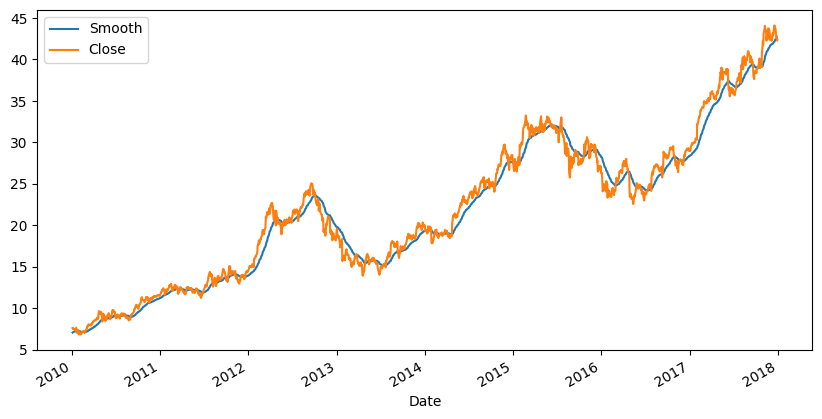

In [25]:
plt.figure(figsize=(10,5))
stockdt.loc["2010-01-01":"2018-01-01", ['Smooth']].plot(ax=plt.gca())
stockdt.loc["2010-01-01":"2018-01-01", ['Close']].plot(ax=plt.gca())
plt.show()

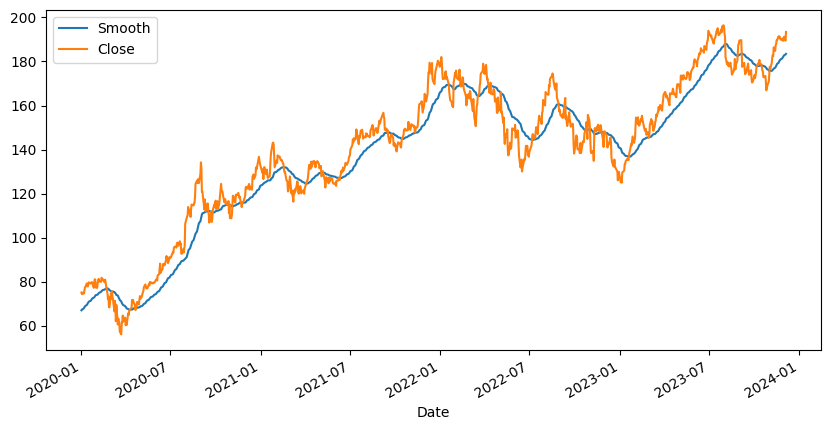

In [26]:
plt.figure(figsize=(10,5))
stockdt.loc["2020-01-01":, ['Smooth']].plot(ax=plt.gca())
stockdt.loc["2020-01-01":, ['Close']].plot(ax=plt.gca())
plt.show()

In [27]:
stockdt

,Open,High,Low,Close,Adj Close,Volume,Smooth
Date,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,469033600,0.128348
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,175884800,0.128348
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,105728000,0.128047
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,86441600,0.127357
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,73449600,0.126824
...,...,...,...,...,...,...,...
2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,43014200,182.107266
2023-11-30,189.839996,190.320007,188.190002,189.949997,189.949997,48794400,182.434089
2023-12-01,190.330002,191.559998,189.229996,191.240005,191.240005,45679300,182.772305


# Technical Indicators


RELATIVE STRENGTH INDEX (RSI)

It evaluates the conditions of overbought and oversold in the stock prices by measuring the extent of recent changes in prices. The RSI compares stock’s average gains and losses over a specific period of time, typically 14 trading days. RSI ranges between 0 and 100, and traditionally, RSI above 70 indicates that the stock is overbought, while RSI below 30 indicates that the stock is oversold.
In this paper, we use a 27-day time-frame to calculate the initial value of the RSI. The formula for calculating RSI is:


$RSI = 100 - \dfrac{100}{1+RS}$


$RS = \dfrac{Average gain over 27 days}{Average loss over 27 days}$

RSI stands for relative strength index, and RS stands for relative strength.


In [28]:
def RSI(series):
    delta = series.diff()
    up = delta.clip(lower = 0)
    down = -1.0*delta.clip(upper = 0)

    ema_up = up.ewm(com = 26, adjust = False).mean()
    ema_down = down.ewm(com = 26, adjust = False).mean()

    rs = ema_up / ema_down
    rsi = 100 - (100 / (1+rs))
    return rsi

In [29]:
stockdt['RSI'] = RSI(stockdt['Smooth'])

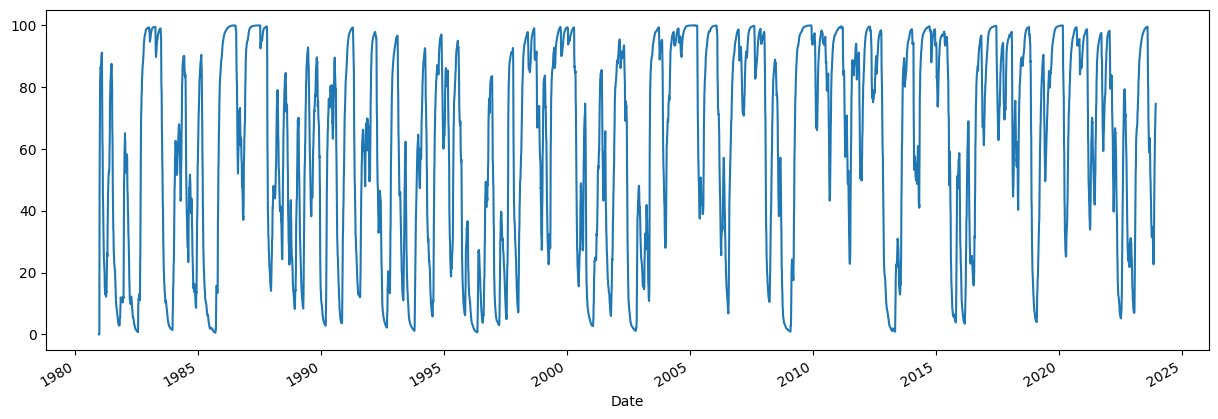

In [30]:
plt.figure(figsize=(15,5))
stockdt['RSI'].plot()
plt.show()

MOVING AVERAGE CONVERGENCE DIVERGENCE (MACD)

The moving average convergence divergence (MACD) is defined to be a trend-following momentum indicator that helps investors understand whether the bearish or bullish movement in prices is becoming stronger or weaker.

It is computed by subtracting the 26-day exponential moving average which is the longer moving average from the 12-day exponential moving average of a security’s prices which is defined to be the shorter one. The line obtained from this calculation called the MACD line and the 9-day exponential moving average of the MACD line called the signal line which can work as an incitement for buy and sell signals. However, MACD indicates a buy signal whenever it is above the signal line and a sell signal whenever it is below the signal line.

The formula for calculating MACD is as follows:


$MACD = EMA_{12}(C) - EMA_{26}(C)$

$SL = EMA_9(MACD)$

MACD stands for moving average convergence divergence or MACD line and SL stands for the signal line.

$EMA_n$= n-day exponential moving average

C = closing price

In [31]:
def MACD(series):
    ema_12 = series.ewm(span = 12).mean()
    ema_26 = series.ewm(span = 26).mean()
    macd = ema_12 - ema_26
    signal = macd.ewm(span = 9).mean()
    return macd, signal

In [32]:
stockdt['MACD'] = MACD(stockdt['Smooth'])[0] - MACD(stockdt['Smooth'])[1]

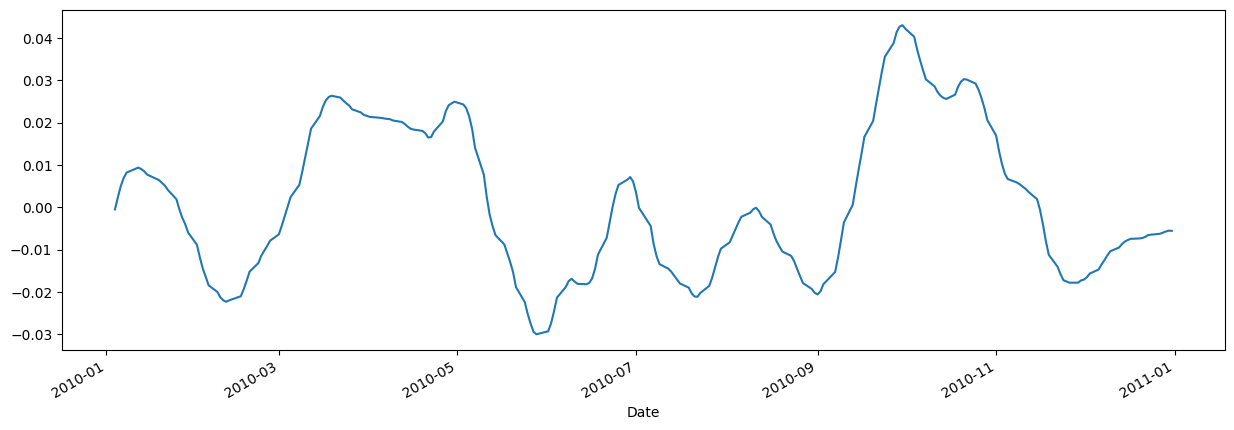

In [35]:
plt.figure(figsize=(15,5))
stockdt.loc['2010-01-01':'2011-01-01', 'MACD'].plot(ax=plt.gca())
plt.show()

PRICE RATE OF CHANGE (ROC)

The price rate of change (ROC) is another momentum oscillator that compares and cal- culates the percent change in price between the current price and the price n-periods ago. In other words, ROC measures the changes between the current price with respect to the earlier closing price in n days ago. It moves from positive to negative, and fluctu- ates above and below the zero-line. However, this oscillator can be used for determining the overbought and oversold conditions, divergences and also zero-line crossovers.
We use a 21-day time-frame to calculate the initial value of the ROC. The formula for calculating ROC is as follows:

$ROC = \dfrac{C_t - C_{t-21}}{C_{t-21}} .100$

where,

ROC stands for price rate of change at time t;

Ct = closing price at time t;

Ct−21 = closing price 21 periods ago

In [36]:
def ROC(series):
    return (series - series.shift(21))*100/series.shift(21)

In [37]:
stockdt['ROC'] = ROC(stockdt['Smooth'])

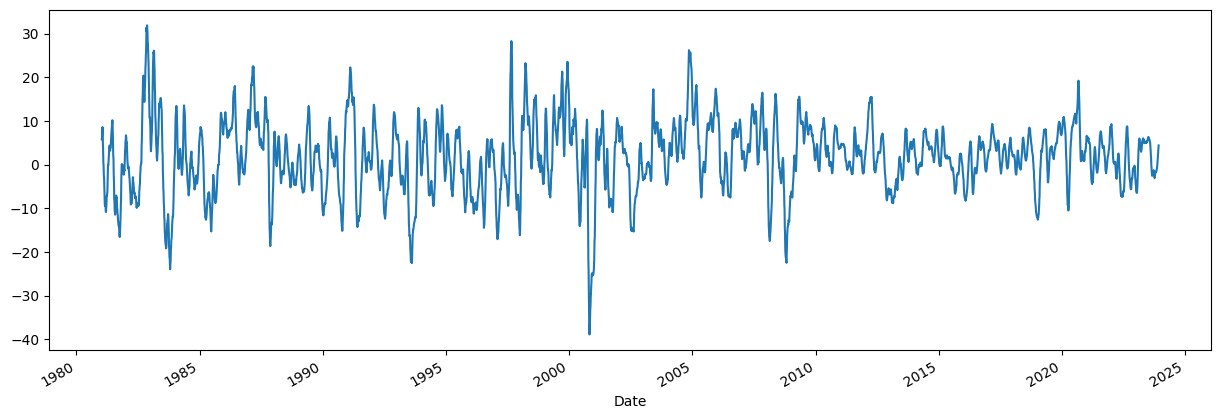

In [38]:
plt.figure(figsize=(15,5))
stockdt['ROC'].plot()
plt.show()

STOCHASTIC OSCILLATOR (%K)

The stochastic oscillator which is often denoted by the symbol (%K), is a momentum oscillator that was developed by George Lane. The stochastic oscillator identifies the location of the stock’s closing price relative to the high and low range of the stock’s price over a period of time, typically being 14 trading days. The stochastic oscillator varies from 0 to 100, a reading above 80 generally represents overbought while below 20 represents oversold. We use a 14-day time-frame %K. The formula for calculating the stochastic oscillator is given below:

$\% K = \dfrac{C_t - L_{14}}{H_{14} - L_{14}} \times 100$

where,

Ct = the current closing price.

L14 = lowest low over the past 14 days H14 = highest high in the last 14 days

In [39]:
def STO_OS(low, high, smooth):
    low_14 = low.rolling(14).min()
    high_14 = high.rolling(14).max()
    return (smooth - low_14)*100/(high_14 - low_14)

In [40]:
stockdt['%K'] = STO_OS(stockdt['Low'], stockdt['High'], stockdt['Smooth'])

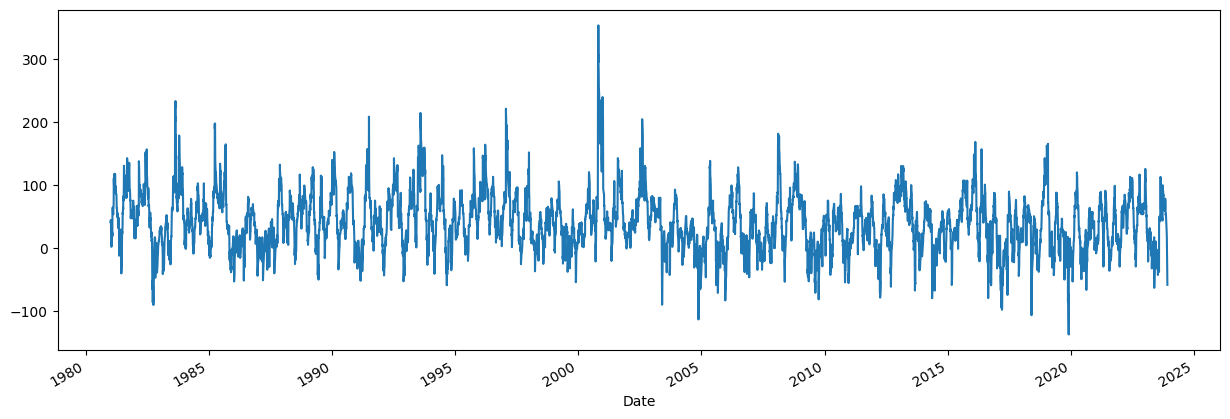

In [41]:
plt.figure(figsize=(15,5))
stockdt['%K'].plot()
plt.show()

WILLIAMS PERCENTAGE RANGE (WILLIAM %R)

Williams percentage range which is also called Williams %R is a common indicator developed by Larry Williams. This indicator is often denoted by the symbol (%R), it measures the overbought and oversold levels and it works inversely to %K. Whilst %K ranges between 0 and 100, %R ranges between 0 and -100. A Williams %R below -80 indicates a buy signal, whereas a Williams %R above -20 indicates a sell signal.
We use also a 14-day time frame %R, the formula used to calculate the Williams %R is:

$\% R = \dfrac{H_{14} - C_t}{H_{14} - L_{14}} \times -100$

where,

Ct = the current closing price

L14 = lowest low over the past 14 days H14 = highest high in the last 14 days


In [42]:
def WILLIAM(low, high, smooth):
    low_14 = low.rolling(14).min()
    high_14 = high.rolling(14).max()
    return (high_14 - smooth)*-100/(high_14 - low_14)

In [43]:
stockdt['%R'] = WILLIAM(stockdt['Low'], stockdt['High'], stockdt['Smooth'])

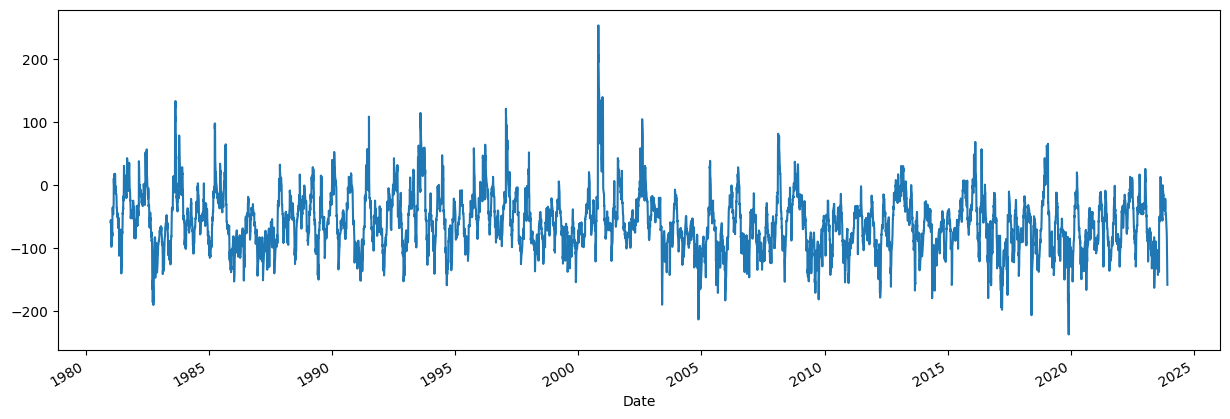

In [44]:
plt.figure(figsize=(15,5))
stockdt['%R'].plot()
plt.show()

COMMODITY CHANNEL INDEX (CCI)

The Commodity Channel Index (CCI) was developed by Donald Lambert, it is a useful oscillator that is used to estimate the direction and the strength of the stock price trend. This indicator is also used to determine when stock prices reach the condition of either overbought and oversold. The CCI is calculated by first determining the difference between the mean price of a stock and the average of the means, then comparing this difference to the average difference over a period of time, typically 20 days. The CCI is often scaled by an inverse factor of 0.015. The formula used to calculate the CCI is:

$CCI = \dfrac{TypicalPrice - MA_{20}}{0.015 \times D}$

where,
Typical price = average of low, high and close prices: $\sum_{i = 1}^{20}(H+L+C)/3$
    
MA20 = simple moving average over 20 days

D = mean deviation

In [45]:
def CCI(high, low, smooth):
    typical_price = (high + low + smooth) / 3
    rolling_mean = typical_price.rolling(window=20).mean()
    rolling_std = typical_price.rolling(window=20).std()
    return (typical_price - rolling_mean) / (0.015 * rolling_std)


In [46]:
stockdt['CCI'] = CCI(stockdt['High'], stockdt['Low'], stockdt['Smooth'])

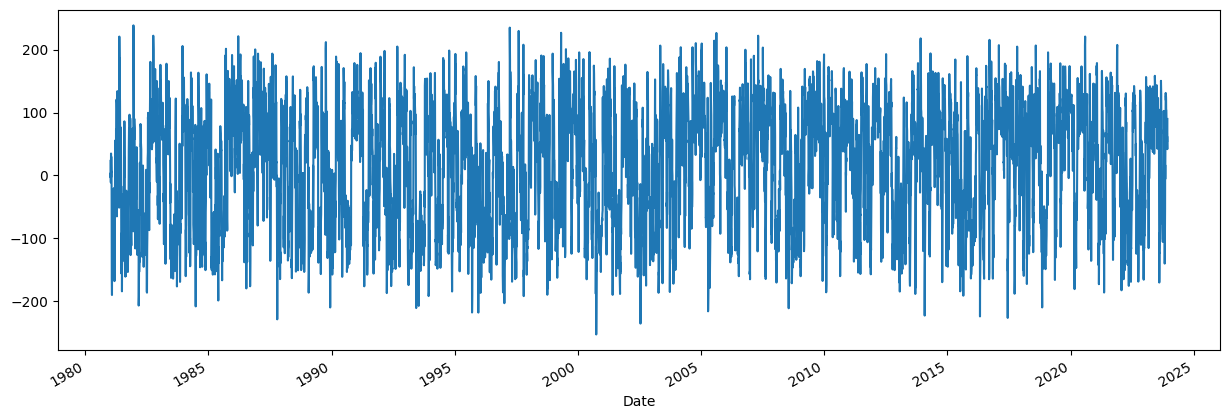

In [47]:
plt.figure(figsize=(15,5))
stockdt['CCI'].plot()
plt.show()

DISPARITY INDEX (DIX)

The Disparity Index (DIX) is another useful indicator that is used commonly in technical analysis. This indicator was developed by Steve Nison and it is a momentum indicator that compares the stock’s current price with its moving average (MA) over a particular time period. DIX below 0 indicates that the stock’s current price is below the n-day MA, DIX above 0 indicates that the stock’s current price is above the n-day MA, whereas in the case the DIX equals 0 indicates that the stock’s current price is equal to the n-day MA. 14-day MA is used in this paper. The formula for calculating the DIX with 14-day MA is as follows:


$DIX = \dfrac{C_t - MA_{14}}{MA_{14} \times 100}$

where,

Ct = current stock price.

MA14 = moving average over 14 days

In [48]:
def DIX(smooth):
    ma_14 = smooth.rolling(window=14).mean()
    return (smooth - ma_14)/(ma_14)

In [49]:
stockdt['DIX'] = DIX(stockdt['Smooth'])

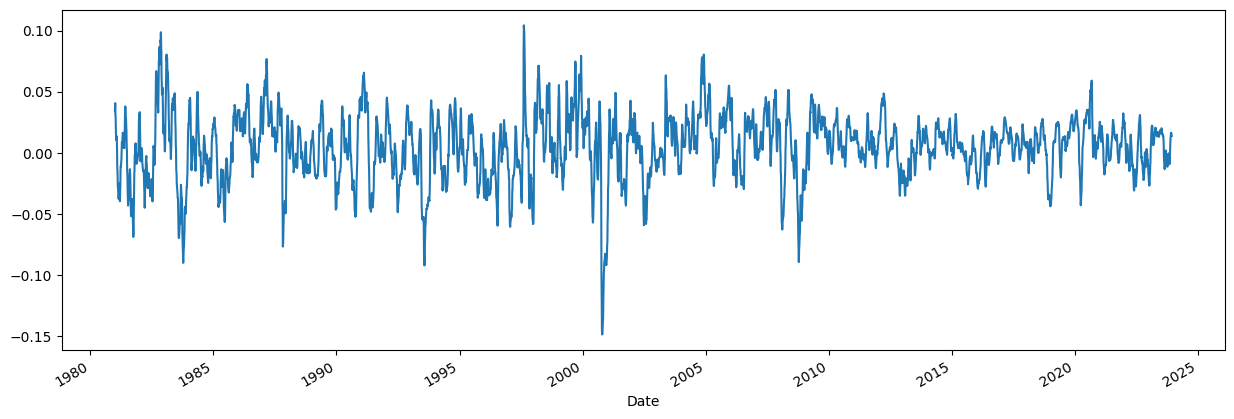

In [50]:
plt.figure(figsize=(15,5))
stockdt['DIX'].plot()
plt.show()

# DATA LABELLING

In [51]:
stockdt['Target_30_smooth'] = np.sign(stockdt['Smooth'].shift(-30) - stockdt['Smooth'])

In [52]:
stockdt.dropna(axis=0, inplace = True)

In [53]:
stockdt[100:150]

,Open,High,Low,Close,Adj Close,Volume,Smooth,RSI,MACD,ROC,%K,%R,CCI,DIX,Target_30_smooth
Date,,,,,,,,,,,,,,,
1981-06-08,0.136719,0.136719,0.136161,0.136161,0.105365,93497600,0.130207,82.461884,0.000635,7.562125,28.978201,-71.021799,26.143670,0.036895,-1.0
1981-06-09,0.138951,0.139509,0.138951,0.138951,0.107524,119593600,0.130475,82.880314,0.000594,7.670140,17.463001,-82.536999,38.216441,0.033807,-1.0
1981-06-10,0.140625,0.142299,0.140625,0.140625,0.108819,25222400,0.130856,83.463558,0.000543,7.831942,-21.179382,-121.179382,47.451951,0.031454,-1.0
1981-06-11,0.146763,0.147321,0.146763,0.146763,0.113569,38976000,0.131296,84.111399,0.000492,8.159778,-39.629513,-139.629513,76.580570,0.029458,-1.0
1981-06-12,0.145647,0.145647,0.145089,0.145089,0.112273,25804800,0.131992,85.072923,0.000457,8.700135,-33.960138,-133.960138,63.453048,0.029395,-1.0
1981-06-15,0.145089,0.145089,0.144531,0.144531,0.111841,143763200,0.132581,85.827127,0.000428,9.176422,-29.159471,-129.159471,57.081388,0.028622,-1.0
1981-06-16,0.142299,0.142299,0.141741,0.141741,0.109682,37251200,0.133119,86.474623,0.000399,9.678556,-24.779363,-124.779363,33.012524,0.027570,-1.0
1981-06-17,0.140067,0.140067,0.139509,0.139509,0.107955,27574400,0.133507,86.922288,0.000361,9.941320,-21.619004,-121.619004,7.635266,0.025751,-1.0
1981-06-18,0.139509,0.140067,0.138951,0.138951,0.107524,23049600,0.133777,87.227885,0.000311,10.018384,-19.418976,-119.418976,-5.517559,0.023459,-1.0


# CORRELATION AMONG FEATURES AND TARGET

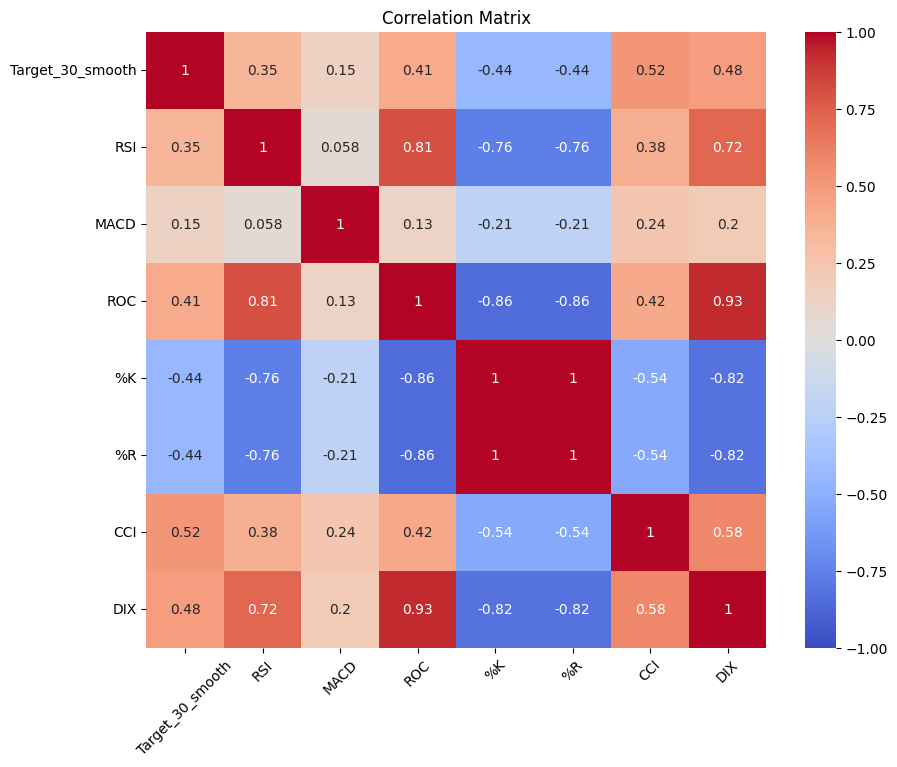

In [54]:
# Calculate the correlation matrix
correlation_matrix = stockdt[['Target_30_smooth', 'RSI', 'MACD', 'ROC', '%K', '%R', 'CCI', 'DIX']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [55]:
stockdt = stockdt.drop('ROC', axis = 1)

In [56]:
stockdt = stockdt.drop('%K', axis = 1)

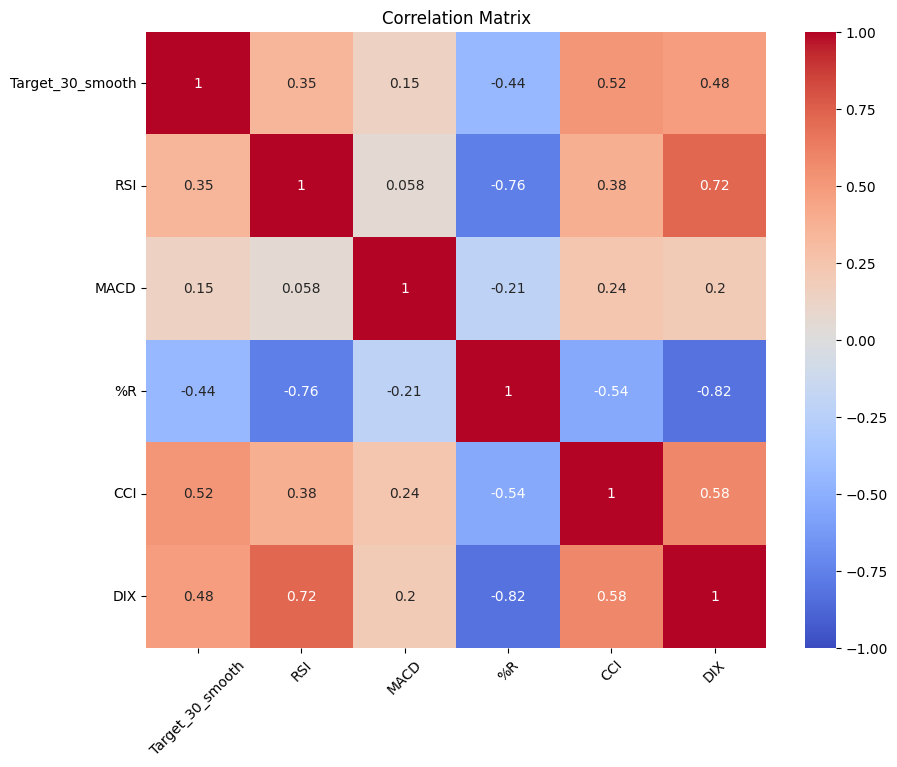

In [57]:
# Calculate the correlation matrix
correlation_matrix_ = stockdt[['Target_30_smooth', 'RSI', 'MACD', '%R', 'CCI', 'DIX']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [58]:
stockdt.loc[:, 'RSI':]

,RSI,MACD,%R,CCI,DIX,Target_30_smooth
Date,,,,,,
1981-01-14,87.196123,0.000308,-97.360072,-3.392498,0.021184,-1.0
1981-01-15,87.271942,0.000247,-97.191646,4.143395,0.016834,-1.0
1981-01-16,87.562367,0.000194,-96.552094,-11.143591,0.013788,-1.0
1981-01-19,87.752625,0.000146,-95.456074,34.906409,0.011015,-1.0
1981-01-20,88.549353,0.000122,-92.553545,-2.900371,0.011510,-1.0
...,...,...,...,...,...,...
2023-10-17,34.715760,0.090682,-28.007481,19.116464,-0.000600,1.0
2023-10-18,34.449805,0.118174,-34.756084,16.360440,-0.000332,1.0
2023-10-19,33.861889,0.133072,-37.114160,19.186933,-0.000499,1.0


# TRAIN TEST SPLIT CASE PREDICTING

In [59]:
X = stockdt.loc[:, 'RSI':'DIX']
y = stockdt.loc[:, 'Target_30_smooth']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

PROPORTION OF UP AND DOWN DAYS IN TRAINING SET

In [60]:
value_counts = pd.Series(y_train).value_counts()

# Get proportion of 1s and -1s
proportion_1 = value_counts.get(1, 0) / len(y_train)
proportion_minus_1 = value_counts.get(-1, 0) / len(y_train)

print("Proportion of 1s:", proportion_1)
print("Proportion of -1s:", proportion_minus_1)

Proportion of 1s: 0.6189151599443672
Proportion of -1s: 0.3810848400556328


PROPORTION OF UP AND DOWN DAYS IN TESTING SET

In [61]:
value_counts = pd.Series(y_test).value_counts()

# Get proportion of 1s and -1s
proportion_1 = value_counts.get(1, 0) / len(y_test)
proportion_minus_1 = value_counts.get(-1, 0) / len(y_test)

print("Proportion of 1s:", proportion_1)
print("Proportion of -1s:", proportion_minus_1)

Proportion of 1s: 0.6179879462216041
Proportion of -1s: 0.3820120537783959


In [62]:
grid_rf = {
'n_estimators': [75, 100, 150, 200],
'max_depth': [2, 5, 7, 9, None],
'max_features': [2, 3, 4]
}

cv = KFold(n_splits=4, shuffle=False)
gscv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_rf, cv=cv, scoring='accuracy')
gscv_fit = gscv.fit(X_train, y_train)
best_parameters = gscv_fit.best_params_
print("Hyperparameter: ", best_parameters)

model = RandomForestClassifier(**best_parameters, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Hyperparameter:  {'max_depth': None, 'max_features': 2, 'n_estimators': 150}


In [63]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
confusion_mat = confusion_matrix(y_test, y_pred)

In [64]:
print("TARGET 30 DAYS")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

TARGET 30 DAYS
Accuracy: 0.8613815484469171
Precision: 0.8588273948598131
Recall: 0.8445186235879358
F1 Score: 0.8504165397800767
Confusion Matrix:
[[ 637  187]
 [ 112 1221]]


# 2 UNSHUFFLED TRAINING SET AND TEST SET CASE

In [65]:
# ^GSPC AAPL IBM
x_train = stockdt.loc['2000-01-01':'2019-05-31', 'RSI':'DIX']
y_train = stockdt.loc['2000-01-01':'2019-05-31', 'Target_30_smooth']

PROPORTION OF UP AND DOWN DAYS IN TRAINING SET

In [66]:
value_counts = y_train.value_counts()

# Get proportion of 1s and -1s
proportion_1 = value_counts.get(1, 0) / len(y_train)
proportion_minus_1 = value_counts.get(-1, 0) / len(y_train)

print("Proportion of 1s:", proportion_1)
print("Proportion of -1s:", proportion_minus_1)

Proportion of 1s: 0.6737661273807086
Proportion of -1s: 0.32623387261929143


In [67]:
x_train

,RSI,MACD,%R,CCI,DIX
Date,,,,,
2000-01-03,99.319520,-0.003198,-80.302908,75.009721,0.020798
2000-01-04,99.357061,-0.003033,-76.807346,70.479988,0.025276
2000-01-05,99.371052,-0.002935,-87.430571,95.901823,0.024737
2000-01-06,99.387481,-0.002848,-90.452820,24.576573,0.024697
2000-01-07,98.804004,-0.003004,-90.882443,-18.436489,0.020495
...,...,...,...,...,...
2019-05-24,69.756418,-0.226394,-48.834141,-96.324351,-0.011809
2019-05-28,66.600478,-0.242188,-47.255163,-93.484926,-0.013822
2019-05-29,63.589316,-0.255627,-38.878018,-92.976643,-0.015520


In [68]:
grid_rf = {
'n_estimators': [75, 100, 150, 200],
'max_depth': [2, 5, 7, 9, None],
'max_features': [2, 3, 4]
}

cv = KFold(n_splits=4, shuffle=False)
gscv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_rf, cv=cv, scoring='accuracy')
gscv_fit = gscv.fit(x_train, y_train)
best_parameters = gscv_fit.best_params_
print("Hyperparameter: ", best_parameters)

model = RandomForestClassifier(**best_parameters, random_state = 42)
model.fit(x_train, y_train)

Hyperparameter:  {'max_depth': 5, 'max_features': 3, 'n_estimators': 75}


RandomForestClassifier(max_depth=5, max_features=3, n_estimators=75,
                       random_state=42)

In [69]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
confusion_mat = confusion_matrix(y_test, y_pred)

In [70]:
print("TARGET 30 DAYS")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

TARGET 30 DAYS
Accuracy: 0.8613815484469171
Precision: 0.8588273948598131
Recall: 0.8445186235879358
F1 Score: 0.8504165397800767
Confusion Matrix:
[[ 637  187]
 [ 112 1221]]


# MODEL TESTING FROM 2020-06-01

In [71]:
y_pred = model.predict(stockdt.loc['2020-06-01':, 'RSI':'DIX'].values)
y_test = stockdt.loc['2020-06-01':, 'Target_30_smooth'].values

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


PROPORTION OF UP AND DOWN DAYS IN TESTING SET

In [72]:
value_counts = pd.Series(y_test).value_counts()

# Get proportion of 1s and -1s
proportion_1 = value_counts.get(1, 0) / len(y_test)
proportion_minus_1 = value_counts.get(-1, 0) / len(y_test)

print("Proportion of 1s:", proportion_1)
print("Proportion of -1s:", proportion_minus_1)

Proportion of 1s: 0.647196261682243
Proportion of -1s: 0.352803738317757


In [73]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
confusion_mat = confusion_matrix(y_test, y_pred)

In [75]:
print("TARGET 30 DAYS FROM 2020-06-01")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

TARGET 30 DAYS FROM 2020-06-01
Accuracy: 0.741822429906542
Precision: 0.7223237625656175
Recall: 0.6875762067564013
F1 Score: 0.6964319813856461
Confusion Matrix:
[[152 150]
 [ 71 483]]


# K-FOLDS CROSS-VALIDATION

In [76]:
X = stockdt.loc[:, 'RSI':'DIX'].values
y = stockdt.loc[:, 'Target_30_smooth'].values

In [77]:
folds = 5

In [78]:
kfold = KFold(n_splits=folds, shuffle=False)
models = []
scores = []

In [ ]:
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    value_counts_train = pd.Series(y_train).value_counts()

    # Get proportion of 1s and -1s in training set
    proportion_1_train = value_counts_train.get(1, 0) / len(y_train)
    proportion_minus_1_train = value_counts_train.get(-1, 0) / len(y_train)

    print("Proportion of 1s of Target_30_smooth in training set:", proportion_1_train)
    print("Proportion of -1s of Target_30_smooth in training set:", proportion_minus_1_train)

    value_counts_test = pd.Series(y_test).value_counts()

    # Get proportion of 1s and -1s in testing set
    proportion_1_test = value_counts_test.get(1, 0) / len(y_test)
    proportion_minus_1_test = value_counts_test.get(-1, 0) / len(y_test)

    print("Proportion of 1s of Target_30_smooth in testing set:", proportion_1_test)
    print("Proportion of -1s of Target_30_smooth in testing set:", proportion_minus_1_test)

    grid_rf = {
    'n_estimators': [75, 100, 150, 200],
    'max_depth': [2, 5, 7, 9, None],
    'max_features': [2, 3, 4]
    }

    cv = KFold(n_splits=4, shuffle=False)
    gscv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_rf, cv=cv, scoring='accuracy')
    gscv_fit = gscv.fit(X_train, y_train)
    best_parameters = gscv_fit.best_params_
    print("Hyperparameter: ", best_parameters)

    model = RandomForestClassifier(**best_parameters, random_state = 42)
    model.fit(X_train, y_train)

    models.append(model)

    training_error = 1 - accuracy_score(y_train, model.predict(X_train))
    print("Training error:", training_error)

    y_pred = model.predict(X_test)

    score = model.score(X_test, y_test)
    scores.append(score)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    confusion_mat = confusion_matrix(y_test, y_pred)

    print("TARGET 30 DAYS")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:")
    print(confusion_mat)


Proportion of 1s of Target_30_smooth in training set: 0.6380389429763561
Proportion of -1s of Target_30_smooth in training set: 0.36196105702364395
Proportion of 1s of Target_30_smooth in testing set: 0.5414928140936486
Proportion of -1s of Target_30_smooth in testing set: 0.4585071859063514


# FEATURE IMPORTANCE IN K-FOLDS CROSS-VALIDATION

In [ ]:
model_names = ['1st model', '2nd model', '3rd model', '4th model', '5th model']

feature_importances = []
for model in models:
    importance = model.feature_importances_
    feature_importances.append(importance)

num_features = len(x_train.columns)
bar_width = 0.12
index = np.arange(num_features)
colors = ['bisque', 'sienna', 'sandybrown', 'tan', 'wheat']  # Lighter shades of blue, green, and red

# Plotting the feature importance
plt.figure(figsize=(12, 6))

for i, feature_importance in enumerate(feature_importances):
    sorted_indices = feature_importance.argsort()[::-1]
    sorted_importance = feature_importance[sorted_indices]
    sorted_features = x_train.columns[sorted_indices]

    plt.bar(index + i * bar_width, sorted_importance, bar_width, align='center', color=colors[i], label=model_names[i])

plt.xticks(index+bar_width*2, sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.legend()
plt.tight_layout()
plt.show()


# ROLLING CROSS-VALIDATION

In [ ]:
folds = 5

In [ ]:
tscv = TimeSeriesSplit(n_splits=folds)
models_ts = []
score_ts = []
train_ts = []

In [ ]:
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    print(len(X_train))

    value_counts_train = pd.Series(y_train).value_counts()

    # Get proportion of 1s and -1s in training set
    proportion_1_train = value_counts_train.get(1, 0) / len(y_train)
    proportion_minus_1_train = value_counts_train.get(-1, 0) / len(y_train)

    print("Proportion of 1s of Target_30_smooth in training set:", proportion_1_train)
    print("Proportion of -1s of Target_30_smooth in training set:", proportion_minus_1_train)

    value_counts_test = pd.Series(y_test).value_counts()

    # Get proportion of 1s and -1s in testing set
    proportion_1_test = value_counts_test.get(1, 0) / len(y_test)
    proportion_minus_1_test = value_counts_test.get(-1, 0) / len(y_test)

    print("Proportion of 1s of Target_30_smooth in testing set:", proportion_1_test)
    print("Proportion of -1s of Target_30_smooth in testing set:", proportion_minus_1_test)


    grid_rf = {
    'n_estimators': [75, 100, 150, 200],
    'max_depth': [2, 5, 7, 9, None],
    'max_features': [2, 3, 4]
    }

    cv = KFold(n_splits=4, shuffle=False)
    gscv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_rf, cv=cv, scoring='accuracy')
    gscv_fit = gscv.fit(X_train, y_train)
    best_parameters = gscv_fit.best_params_
    print("Hyperparameter: ", best_parameters)

    model = RandomForestClassifier(**best_parameters, random_state = 42)
    model.fit(X_train, y_train)

    models.append(model)

    training_error = 1 - accuracy_score(y_train, model.predict(X_train))
    print("Training error:", training_error)

    models_ts.append(model)

    training_error = 1 - accuracy_score(y_train, model.predict(X_train))
    train_ts.append(training_error)
    print("Training error:", training_error)

    y_pred = model.predict(X_test)

    score = model.score(X_test, y_test)
    score_ts.append(score)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    confusion_mat = confusion_matrix(y_test, y_pred)

    print("TARGET 30 DAYS")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:")
    print(confusion_mat)


In [ ]:
model_names = ['1st roll', '2nd roll', '3rd roll', '4th roll', '5th roll']

feature_importances = []
for model in models_ts:
    importance = model.feature_importances_
    feature_importances.append(importance)

num_features = len(x_train.columns)
bar_width = 0.12
index = np.arange(num_features)
colors = ['bisque', 'sienna', 'sandybrown', 'tan', 'wheat']  # Lighter shades of blue, green, and red

# Plotting the feature importance
plt.figure(figsize=(12, 6))

for i, feature_importance in enumerate(feature_importances):
    sorted_indices = feature_importance.argsort()[::-1]
    sorted_importance = feature_importance[sorted_indices]
    sorted_features = x_train.columns[sorted_indices]

    plt.bar(index + i * bar_width, sorted_importance, bar_width, align='center', color=colors[i], label=model_names[i])

plt.xticks(index+bar_width*2, sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.legend()
plt.tight_layout()
plt.show()
